## Setup

This guide was written in Python 3.5 and R 3.2.3.

### 0.1 Python & Pip

Download [Python](https://www.python.org/downloads/) and [Pip](https://pip.pypa.io/en/stable/installing/).

Let's install the modules we'll need for this tutorial. Open up your terminal and enter the following commands to install the needed python modules: 

```
pip3 install scipy
pip3 install matplotlib
pip3 install numpy
pip3 install plotly
```


### 0.2 R & R Studio

Install [R](https://www.r-project.org/) and [R Studio](https://www.rstudio.com/products/rstudio/download/).

Next, to install the R packages, cd into your workspace, and enter the following, very simple, command into your bash: 

```
R
```

This will prompt a session in R! From here, you can install any needed packages. For the sake of this tutorial, enter the following into your terminal R session:

```
install.packages("mice")
install.packages("VIM")
install.packages(devtools)
install_github("ujjwalkarn/xda")
```

## Introduction

Exploratory Data Analysis (EDA) is an approach for data analysis that employs a variety of techniques to do the following tasks:

- Maximize insight into a dataset
- Uncover the underlying structure of a dataset
- Detect outliers and anomalies
- Test underlying assumptions


### EDA Techniques

In [this](learn.adicu.com/intro-dv) tutorial, what I didn't mention while overviewing the different types of graphs, is what they're often used for: Exploratory Data Analysis.

Classical techniques are usually quantitative and include things like t-tests, f-tests, and chi-squared tests. In Exploratory Data Analysis, the techniques are usually graphical, including scatter plots, character plots, box plots, histographs, probability plots, residual plots, and mean plots.


## Exploratory Computing


### Finding the Zero

Finding the zero of a function is a common task in exploratory computing. The value where the function equals zero is also called the root and finding the zero is referred to as root finding. There exists a number of methods to find the zero of a function varying from robust but slow (so it always finds a zero but it takes quite a few function evaluations) to fast but not so robust (it can find the zero very fast, but it won't always find it). Here we'll use the latter one:

Consider the function f(x) = 0.5-e<sup>-x</sup>. Let's find the root for this. First, we need to write a Python function for `f(x)`.

In [1]:
import numpy as np
f = lambda x: 0.5 - np.exp(-x)

We will use the method fsolve to find the zero of a function. `fsolve` is part of the `scipy.optimize` package. fsolve takes two arguments: the function and a starting value for the search.


In [2]:
from scipy.optimize import fsolve
xzero = fsolve(f,1)
print('result of fsolve:', xzero)

result of fsolve: [ 0.69314718]


Now, we know that the actual root is equal to `x = -ln(0.5)`. So let's calculate that and compare the two values:


In [3]:
print('exact value of xzero:', -np.log(0.5))

exact value of xzero: 0.69314718056


### Cumulative Density Function

Recall that the Cumulative Density Function provides us with the probability that x takes on a value less than x. 

The Cumulative Density Distribution F(x) of the Normal distribution is given by:

![alt text](https://github.com/lesley2958/stats-programmers/blob/master/normal%20cdf.png?raw=true "Logo Title Text 1")

Now, using the scipy module, we can create the CDF for a Normal Distribution:


In [4]:
from scipy.special import erf

def StandardNormalCdf(x):
    return((erf(x / root2) + 1) / 2)

def NormalCdf(x, mu=0, sigma=1):
    return(StandardNormalCdf(float(x - mu) / sigma))

where &mu; is the mean, &sigma; is the standard deviation, and `erf` is the error function. 

### Continuous Random Variables

The most common probability distribution is the Normal distribution. Random numbers from a Normal distribution may be generated with the `standard_normal` function in the random subpackage of numpy. 

The numbers are drawn from a "standard" Normal distribution, which means a Normal distribution with mean 0 and standard deviation 1. The mean and standard deviation of a dataset can be computed with the functions `mean` and `std` of the numpy package.

So let's begin by importing the needed libraries: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

This line of code gets us 10000 random numbers in an array:


In [6]:
data = rnd.standard_normal(10000)

Now let's check out the mean and standard deviation:


In [7]:
print(np.mean(data))
print(np.std(data))

0.00406881804257
1.00050187793


Note that the results aren't exactly 0 or 1 because they're only estimates of the true underlying mean and standard deviation.


Now, let's try a modified example:


In [8]:
mu = 6.0
sig = 2.0
data = sig * rnd.standard_normal(100) + mu

Next, let's see how a histogram emulates the normal distribution:


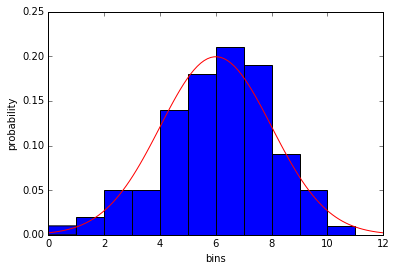

In [10]:
from scipy.stats import norm
a = plt.hist(data, bins=12, range=(0, 12), normed=True)
x = np.linspace(0, 12, 100)
y = norm.pdf(x, 6, 2) 
plt.plot(x, y, 'r')
plt.xlabel('bins')
plt.ylabel('probability')
plt.show()

### Box Whisker

Box-whisker plots are a method to visualize the level and spread of the data, aka the distribution. From a boxplot, you can see whether the data is symmetric or not, and how widely the data are spread. 

Here, we'll review the basics of a box-and-whisker plot:

![alt text](https://github.com/ByteAcademyCo/exp-analysis/blob/master/boxplot2.png?raw=true "Logo Title Text 1")

A box-whisker plot may be created with the boxplot function in the matplotlib package as follows

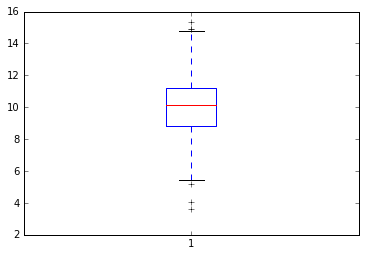

In [11]:
rnd.seed(10)
data = 2 * rnd.standard_normal(500) + 10.0 
a = plt.boxplot(data)
plt.show()

The blue box spans the IQR ranging from the lower quartile (25%) to the upper quartile (75%). The whiskers are the black lines that are connected to the 50% box with the blue dashed lines.

![alt text](https://github.com/ByteAcademyCo/exp-analysis/blob/master/box.png?raw=true "Logo Title Text 1")

## Exploratory Analysis with R

### xda

This R package contains several tools to perform initial exploratory analysis on any input dataset. It includes custom functions for plotting the data as well as performing different kinds of analyses such as univariate, bivariate and multivariate investigation which is the first step of any predictive modeling pipeline

#### Functions

The functions in this package are as follows:

- `numSummary(mydata)` automatically detects all the numeric columns in the dataframe mydata and outputs their summary statistics.
- `charSummary(mydata)` automatically detects all character columns in the dataframe mydata and outputs their summary statistics.
- `Plot(mydata, dep.var)` plots all independent variables in the dataframe mydata against the dependant variable specified by the dep.var parameter.
- `removeSpecial(mydata, vec)` replaces all special characters in the dataframe mydata with NA.
- `bivariate(mydata, dep.var, indep.var)` performs bivariate analysis between dependent variable dep.var and independent variable indep.var in the dataframe mydata.

#### Example 

Using the built-in iris dataset, we'll use the functions above.

In [12]:
library(xda)

NameError: name 'library' is not defined

So we begin with summary statistics:


In [2]:
numSummary(iris)
charSummary(iris)

,n,mean,sd,max,min,range,nunique,nzeros,iqr,lowerbound,⋯,mode,miss,miss%,1%,5%,25%,50%,75%,95%,99%
Sepal.Length,150,5.84,0.828,7.9,4.3,3.6,35,0,1.30,3.15,⋯,5.0,0,0,4.40,4.60,5.1,5.80,6.4,7.25,7.70
Sepal.Width,150,3.06,0.436,4.4,2.0,2.4,23,0,0.50,2.05,⋯,3.0,0,0,2.20,2.34,2.8,3.00,3.3,3.80,4.15
Petal.Length,150,3.76,1.765,6.9,1.0,5.9,43,0,3.55,-3.72,⋯,1.4,0,0,1.15,1.30,1.6,4.35,5.1,6.10,6.70
Petal.Width,150,1.20,0.762,2.5,0.1,2.4,22,0,1.50,-1.95,⋯,0.2,0,0,0.10,0.20,0.3,1.30,1.8,2.30,2.50


,n,miss,miss%,unique,top5levels:count
Species,150,0,0,3,"setosa:50, versicolor:50, virginica:50"


Recall, bi-variate Analysis finds out the relationship between two variables. To perform bivariate analysis between 'Species' and 'Sepal.Length' in the iris dataset, we do the following:


In [3]:
bivariate(iris,'Species','Sepal.Length')

bin_Sepal.Length,setosa,versicolor,virginica
"(4.3,5.2]",39,5,1
"(5.2,6.1]",11,29,10
"(6.1,7]",0,16,27
"(7,7.9]",0,0,12


And lastly, let's get some exploratory plot graphs:

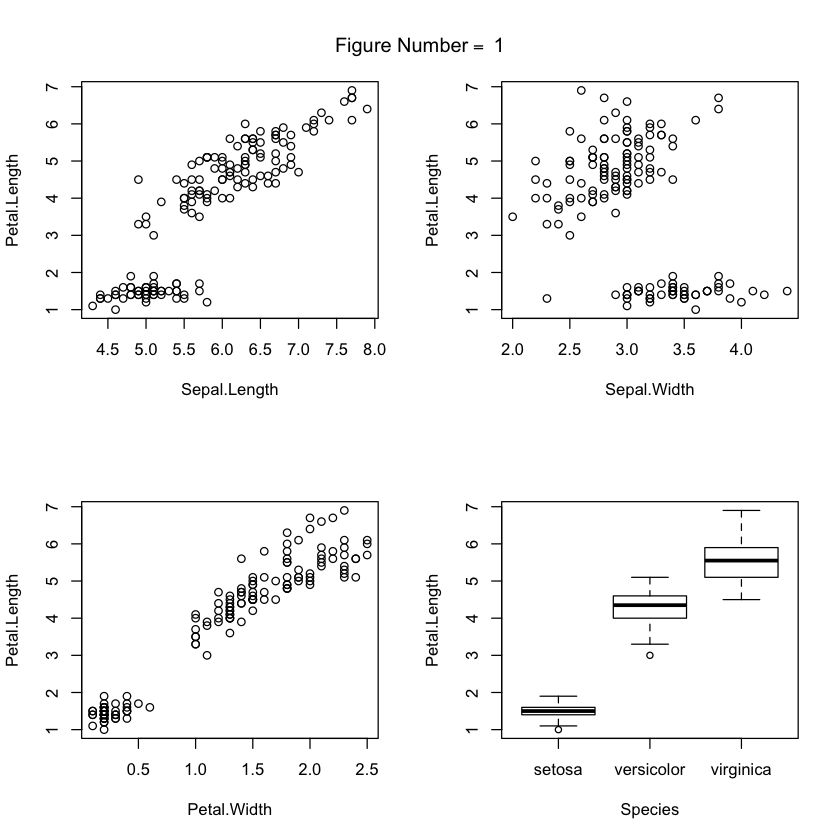

In [4]:
Plot(iris, 'Petal.Length')

## Heatmaps

A heat map is a two-dimensional representation of data in which values are represented by colors.

### Plotly

Plotly is an online analytics and data visualization tool that provides online graphing, analytics, and statistics tools. In python, you can use its library to visualize heatmaps!


In [13]:
import plotly.plotly as py
import plotly.graph_objs as go

We'll begin with a basic example of a heatmap. Using the heatmap class, we:


In [14]:
data = [
    go.Heatmap(
        z=[[1, 20, 30],
           [20, 1, 60],
           [30, 60, 1]]
    )
]
py.plot(data, filename='basic-heatmap')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


''

We can add categorical axis labels, like the following: 

In [4]:
data = [
    go.Heatmap(
        z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
        x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
        y=['Morning', 'Afternoon', 'Evening']
    )
]
py.plot(data, filename='labelled-heatmap')

'https://plot.ly/~lc2958/14'

### Seaborn

Seaborn is yet another Python module available for making heatmap visualizations:

In [16]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

Next, we create random data and put it to a heatmap: 


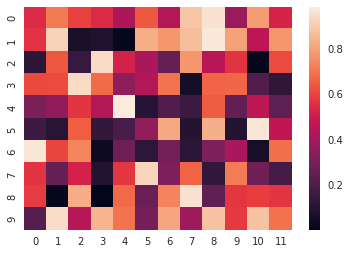

In [17]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)
plt.show()

Similar to plotly, we can plot a dataframe with meaningful row and column labels:


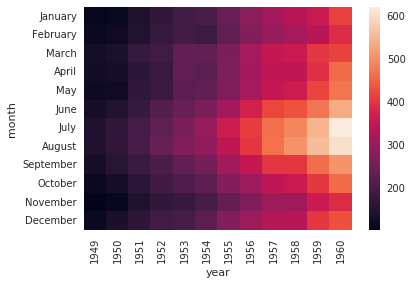

In [18]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)
plt.show()

Furthermore, we can go a step further and annotate each cell with the numeric value using integer formatting:


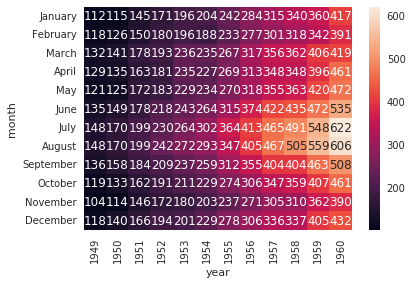

In [19]:
ax = sns.heatmap(flights, annot=True, fmt="d")
plt.show()

Lastly, we can use a mask to plot only part of a matrix:


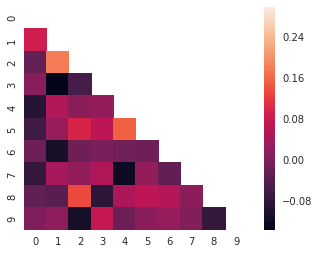

In [20]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
plt.show()